In [29]:
# 1: Better training set
# (i) Dense sampling of inputs
# (ii) Minimize mislabeled data
# (iii) Clean data and deal with missing values
# (iv) Feature selection, keep only useful features

In [30]:
# 2: Feature engineering
# Deep learning allows for us to automate feature engineering, however, keeping good features:
# (i) allows us to work with less computational resources
# (ii) allows us to work with less training data

In [31]:
# 3: EarlyStopping callback
# Interrupt training as soon as validation metrics have stopped imporving, while remembering the best mdoel state

In [32]:
# 4: Regularizing
# (i) Reducing model's capacity (for small deep learning models)
# (ii) Weight regularization (for small deep learning models)
# (iii) Adding dropout (for larger deep learning models)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [34]:
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

In [35]:
train_data.shape

(25000,)

In [ ]:
# train_data[0]

In [37]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros(shape=(len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

train_data = vectorize_sequences(train_data)

In [38]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [41]:
# Original model
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1,  activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy"])

history_original = model.fit(train_data,
                   train_labels,
                   epochs = 20,
                   batch_size = 512,
                   validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.7058 - loss: 0.6075 - val_accuracy: 0.8686 - val_loss: 0.4118
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8916 - loss: 0.3602 - val_accuracy: 0.8783 - val_loss: 0.3294
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9181 - loss: 0.2589 - val_accuracy: 0.8892 - val_loss: 0.2867
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9330 - loss: 0.2099 - val_accuracy: 0.8890 - val_loss: 0.2812
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9459 - loss: 0.1698 - val_accuracy: 0.8886 - val_loss: 0.2758
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9579 - loss: 0.1447 - val_accuracy: 0.8886 - val_loss: 0.2804
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9640 - loss: 0.1257 - val_accuracy: 0.8859 - val_loss: 0.2896
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9703 - loss: 0.1073 - val_accuracy: 0.8827 - 

In [42]:
history_original_dict = history_original.history
history_original_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [43]:
# Smaller model
# (i) Reducing model's capacity (for small deep learning models)

model = keras.Sequential([
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(1,  activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy"])

history_small = model.fit(train_data,
                   train_labels,
                   epochs = 20,
                   batch_size = 512,
                   validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5549 - loss: 0.6714 - val_accuracy: 0.6472 - val_loss: 0.6122
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7180 - loss: 0.5919 - val_accuracy: 0.7911 - val_loss: 0.5597
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8102 - loss: 0.5371 - val_accuracy: 0.8079 - val_loss: 0.5196
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8487 - loss: 0.4925 - val_accuracy: 0.8296 - val_loss: 0.4888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8860 - loss: 0.4511 - val_accuracy: 0.8251 - val_loss: 0.4698
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9014 - loss: 0.4154 - val_accuracy: 0.8812 - val_loss: 0.4167
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9328 - loss: 0.3470 - val_accuracy: 0.8839 - val_loss: 0.3565
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9398 - loss: 0.2726 - val_accuracy: 0.8894 - 

In [44]:
history_small_dict = history_small.history

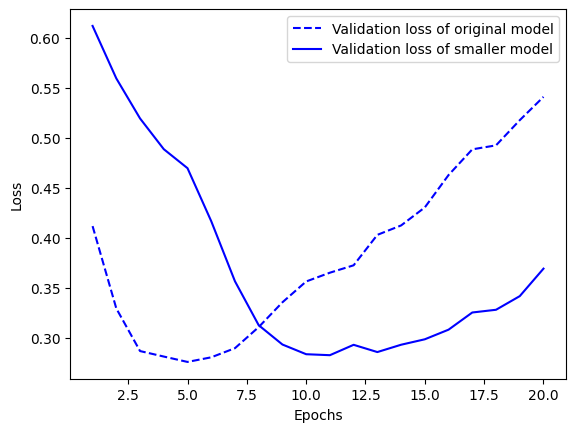

In [45]:
val_loss_original = history_original_dict['val_loss']
val_loss_small = history_small_dict['val_loss']

epochs = range(1, len(val_loss_original) + 1)

plt.plot(epochs, val_loss_original, 'b--', label = "Validation loss of original model")
plt.plot(epochs, val_loss_small, 'b-', label = "Validation loss of smaller model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Original model is overfitting from 4th epoch while smaller model starts overfitting from 8th epoch

In [46]:
# Larger model
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(512, activation = "relu"),
    layers.Dense(1,  activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
                       loss = "binary_crossentropy",
                       metrics = ["accuracy"])

history_large = model.fit(train_data,
                   train_labels,
                   epochs = 20,
                   batch_size = 512,
                   validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.6904 - loss: 0.6658 - val_accuracy: 0.7348 - val_loss: 0.5366
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8387 - loss: 0.3668 - val_accuracy: 0.8869 - val_loss: 0.2927
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9185 - loss: 0.2216 - val_accuracy: 0.8933 - val_loss: 0.2666
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9327 - loss: 0.1815 - val_accuracy: 0.8316 - val_loss: 0.4363
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9365 - loss: 0.1602 - val_accuracy: 0.8104 - val_loss: 0.4674
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9603 - loss: 0.1145 - val_accuracy: 0.8867 - val_loss: 0.3247
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.8836 - val_loss: 0.3758
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9757 - loss: 0.0769 - val_accuracy: 0.8844 - 

In [47]:
history_large_dict = history_large.history

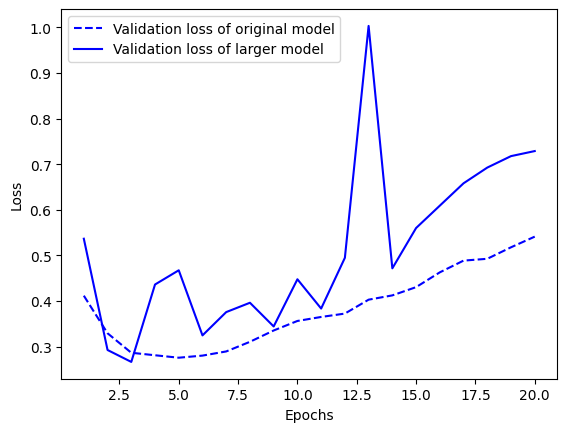

In [49]:
val_loss_original = history_original_dict['val_loss']
val_loss_large = history_large_dict['val_loss']

epochs = range(1, len(val_loss_original) + 1)

plt.plot(epochs, val_loss_original, 'b--', label = "Validation loss of original model")
plt.plot(epochs, val_loss_large, 'b-', label = "Validation loss of larger model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Original model is overfitting from 4th epoch while larger model starts overfitting from 3rd epoch and overfitting is quite severe

In [50]:
# (ii) Weight regularization (for small deep learning models)
# Adding L2 weight regularization to the model

# L1 regularization -> cost addded is proportional to the absolute value of the weight coefficients
# L2 regularization -> cost added is proportional to the square of the value of the weight coefficients
# 0.002 * weight coefficients ** 2
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002) , activation = "relu"),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history_l2_reg = model.fit(train_data, train_labels,
          epochs = 20,
          batch_size = 512,
          validation_split = 0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6909 - loss: 0.7025 - val_accuracy: 0.8513 - val_loss: 0.4991
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8851 - loss: 0.4401 - val_accuracy: 0.8729 - val_loss: 0.4075
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9089 - loss: 0.3494 - val_accuracy: 0.8849 - val_loss: 0.3708
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9242 - loss: 0.2982 - val_accuracy: 0.8722 - val_loss: 0.3837
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9304 - loss: 0.2773 - val_accuracy: 0.8881 - val_loss: 0.3551
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9438 - loss: 0.2572 - val_accuracy: 0.8680 - val_loss: 0.4017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9436 - loss: 0.2476 - val_accuracy: 0.8775 - val_loss: 0.3778
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9486 - loss: 0.2354 - val_accuracy: 0.8842 - v

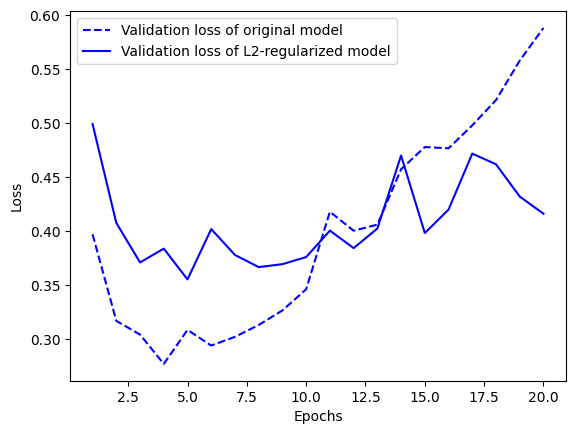

In [53]:
history_l2_reg_dict = history_l2_reg.history
history_original_dict = history_original.history

val_loss_original = history_original_dict['val_loss']
val_loss_l2_reg = history_l2_reg_dict['val_loss']

epochs = range(1, len(val_loss_original) + 1)
plt.plot(epochs, val_loss_original, 'b--', label = "Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, 'b-', label = "Validation loss of L2-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Model with L2 regularization has become much more resistant to overfitting than the original model,
# even though both models have the same number of parameters

In [ ]:
from tensorflow.keras import regularizers
# kernel_regularizer = regularizers.l2(0.002)

regularizers.l1(0.001) # L1 regularization
regularizers.l1_l2(l1 = 0.001, l2 = 0.002) # Simulataneous L1 and L2 regularization

In [ ]:
# (iii) Adding dropout (for larger deep learning models)
# Dropout-regularized model

In [ ]:
layer_output *= np.random.randint(0, high = 2, size = layer_output.shape) # Training time, drops out 50% of the units in the output
# Since it’s uniform, there’s a 50% chance of 0 and a 50% chance of 1 for each position.
layer_output *= 0.5 # Test time

In [ ]:
# implemented in practice
layer_output *= np.random.randint(0, high=2, size = layer_output.shape)
layer_output /= 0.5

In [54]:
train_data.shape

(25000, 10000)

In [55]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history_dropout = model.fit(train_data, train_labels,
                            epochs =20,
                            batch_size = 512,
                            validation_split = 0.4)

# Dropout doesn't change shape

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.5755 - loss: 0.6665 - val_accuracy: 0.8265 - val_loss: 0.5509
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7208 - loss: 0.5642 - val_accuracy: 0.8672 - val_loss: 0.4421
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7866 - loss: 0.4896 - val_accuracy: 0.8751 - val_loss: 0.3720
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8291 - loss: 0.4086 - val_accuracy: 0.8822 - val_loss: 0.3296
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8663 - loss: 0.3539 - val_accuracy: 0.8880 - val_loss: 0.2900
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8916 - loss: 0.3075 - val_accuracy: 0.8907 - val_loss: 0.2781
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9105 - loss: 0.2674 - val_accuracy: 0.8892 - val_loss: 0.2745
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9245 - loss: 0.2263 - val_accuracy: 0.8891 - 

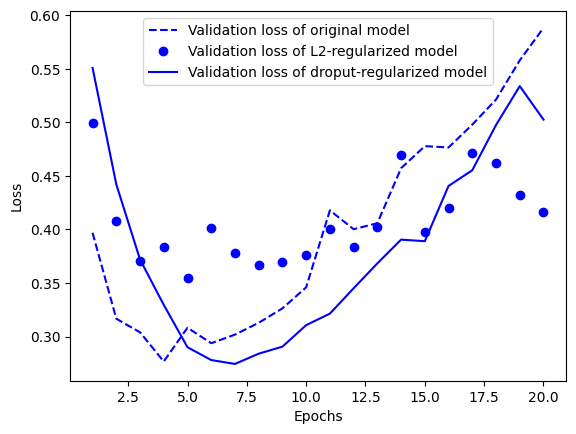

In [57]:
history_dropout_dict = history_dropout.history
history_original_dict = history_original.history

val_loss_original = history_original_dict['val_loss']
val_loss_droput = history_dropout_dict['val_loss']

epochs = range(1, len(val_loss_original) + 1)
plt.plot(epochs, val_loss_original, 'b--', label = "Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, 'bo', label = "Validation loss of L2-regularized model")
plt.plot(epochs, val_loss_droput, 'b-', label = "Validation loss of droput-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [58]:
# The maximzation of generalization is provided by Dropout model as Validation loss decreases, stays lower, and rises more slowly.
# At many epochs (5–15), it has the lowest validation loss among the three.

# Original model is quickly overfitting after 5-6 epochs
# L2 regularized model loss decreases and then levels out between 0.35 and 0.45 less overfitting than original, but not the lowest overall validation loss